<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_10_1_IMinuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMinuit

Minuit - программа численной минимизации функций многих переменных, широко применяемая в физике элементарных частиц. Есть два питонских интерфейса, PyMinuit и IMinuit (он особенно удобен в ipython).

In [ ]:
!pip install iminuit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from iminuit import Minuit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Простой пример

Определим квадратичную функцию от двух параметров.

In [ ]:
def f(a,b):
    return 10*a**2+10*b**2-16*a*b+12*a-24*b

In [ ]:
from iminuit import Minuit, describe
describe(f)

['a', 'b']

Создадим объект класса `Minuit`. `a` и `b` - грубые догадки, около чего надо искать минимум; `error_a` и `error_b` - оценки точности этих догадок (в начале минимизации программа будет делать шаги порядка этих величин, потом они будут уменьшаться). Пределы изменения задавать не обязательно. Валичина `errordef` показывает, насколько функция должна быть выше своего минимума, чтобы это считалось отклонением на одну сигму; поскольку минимизируемая функция - это, как правило, $\chi^2$, значение 1 по умолчанию вполне годится.

In [ ]:
from iminuit import Minuit

m=Minuit(f, a=5, b=5)
# set step size with error_<name>=... keyword
#m=Minuit(f, a=5, b=5, error_a=0.1, error_b=0.1)
#m=Minuit(f,a=0,error_a=1,limit_a=(-10, 10), b=0,error_b=1,limit_b=(-10, 10))

Наиболее популярный метод минимизации - `migrad`.

In [ ]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 31               │
│ EDM = 1.25e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

Значения параметров.

In [ ]:
m.values

<ValueView a=1.0000000000433014 b=2.0000000000541194>

Значение функции в точке минимума.

In [ ]:
m.fval

-17.999999999999996

Ошибки параметров.

In [ ]:
m.errors

<ErrorView a=0.5270462767576469 b=0.5270462771827125>

In [ ]:
# calling hesse explicitly
#явный вызов Гессе
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 51               │
│ EDM = 1.09e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

Если, скажем, $a$ - наш окончательный физический результат, то мы напишем в статье $a=1\pm0.5$. На самом деле у нас есть больше информации, поскольку ошибки $a$ и $b$ сильно скоррелированы. Матрица корреляции ошибок:

100% (3 of 3) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2735e50350>,
       dtype=object))

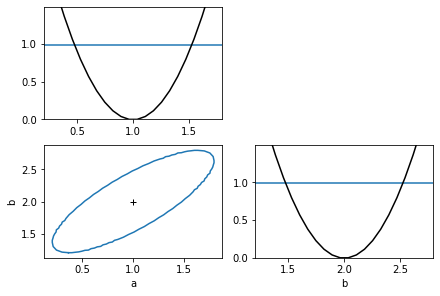

In [ ]:
m.draw_mnmatrix()


Минимизация квадратичной формы сводится к решению системы линейных уравнений, а матрица корреляции ошибок - обратная матрица этой системы. В таком простом случае не имеет смысла использовать инструмент минимизации произвольных функций, такой, как Minuit.

In [ ]:
M=array([[10.,-8.],[-8.,10.]])
M=inv(M)
M

array([[0.27777778, 0.22222222],
       [0.22222222, 0.27777778]])

In [ ]:
M@array([[-6],[12]])

array([[1.],
       [2.]])

Нарисуем контуры, соответствующие отклонению на 1, 2 и 3 сигмы от оптимальной точки.

In [ ]:
m.draw_mncontour('a','b',nsigma=3)

TypeError: ignored

То же в виде цветов.

In [ ]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

AttributeError: ignored

## Дайте мне 3 параметра, и я профитирую слона. С 4 параметрами он будет махать хоботом.

Пусть у нас есть экспериментальные данные, и мы хотим профитировать их прямой.

In [ ]:
def fit(a,b,x):
    return a*x+b

Данные не настоящие, а сгенерированные. Все имеют ошибки 0.1.

In [ ]:
x=linspace(0,1,11)
dy=0.1*ones(11)
y=x+dy*normal(size=11)

Функция $\chi^2$.

In [ ]:
def chi2(a,b):
    global x,y,dy
    return (((y-fit(a,b,x))/dy)**2).sum()

Минимизируем.

In [ ]:
m=Minuit(chi2,a=0,b=0,error_a=1,error_b=1)

In [ ]:
m.migrad()

In [ ]:
m.values

In [ ]:
m.fval

In [ ]:
m.matrix()

In [ ]:
m.draw_mncontour('a','b',nsigma=3)

In [ ]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

In [ ]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(0,1,101)
plot(xt,fit(m.values['a'],m.values['b'],xt),'b-')
plot(xt,fit(1,0,xt),'g--')

Когда фитирующая функция есть линейная комбинация каких-то фиксированных функций с неизвестными коэффициентами, минимизация $\chi^2$ сводится к решению системы линейных уравнений. Нет надобности использовать Minuit.

## Резонанс без фона

Пусть теперь наша фитирующая функция - Брейт-Вигнеровский резонанс (без фона), с двумя параметрами - положением и шириной (лучше бы ввести третий - высоту, но я не стал этого делать для простоты). Теперь $\chi^2$ - сложная нелинейная функция параметров.

In [ ]:
def fit(x0,Gamma,x):
    return 1/((x-x0)**2+Gamma**2)

Вот наши экспериментальные данные (с ошибками 0.1).

In [ ]:
x=linspace(-3,3,21)
dy=0.1*ones(21)
y=fit(0,1,x)+dy*normal(size=21)

Минимизируем $\chi^2$.

In [ ]:
def chi2(x0,Gamma):
    global x,y,dy
    return (((y-fit(x0,Gamma,x))/dy)**2).sum()

In [ ]:
m=Minuit(chi2,x0=0,error_x0=1,Gamma=1,error_Gamma=1)

In [ ]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 825              │
│ EDM = 1.01e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

In [ ]:
m.values

<ValueView a=1.0000000000433014 b=2.0000000000541194>

In [ ]:
m.fval

-17.999999999999996

In [ ]:
m.errors

<ErrorView a=0.5270464487103346 b=0.5270465632194063>

In [ ]:
m.matrix()

AttributeError: ignored

In [ ]:
m.draw_mncontour('x0','Gamma',nsigma=3)

TypeError: ignored

In [ ]:
x0,Gamma,g,r=m.mncontour_grid('x0','Gamma',nsigma=3)
pcolormesh(x0,Gamma,g)
colorbar()

AttributeError: ignored

Теперь контуры постоянной высоты $\chi^2$ - уже не симметричные эллипсы с центром в оптимальной точке, а какие-то сложные кривые. Ошибки положения и ширины резонанса довольно-таки независимы.

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

In [ ]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(-3.5,3.5,101)
plot(xt,fit(m.values['x0'],m.values['Gamma'],xt),'b-')
plot(xt,fit(0,1,xt),'g--')